<a href="https://colab.research.google.com/github/DaffaSuadaa/Customer_Segmentation-RFM-Company_UK_Based-Lifetimes/blob/main/CustomerSegmentation(LifeTimes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install library
%matplotlib inline
!pip install lifetimes
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.8 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=9c07c052d6490bcf46942e984261c5fa61a41ea5120564f2262f9e5c3ea4cfee
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes.utils import summary_data_from_transaction_data
from jcopml.plot import plot_missing_value

In [ ]:
#load dataset
url = 'https://docs.google.com/spreadsheets/d/1oIMJS-2o4XsuM33j91loDubrHO8lHtm_jcUzT58nfhQ/edit#gid=711722252'
url_sheet_trf_1 = url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(url_sheet_trf_1)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536414,22139,NaN,56,12/1/2010 11:52:00,0.0,NaN,United Kingdom
1,536545,21134,NaN,1,12/1/2010 14:32:00,0.0,NaN,United Kingdom
2,536546,22145,NaN,1,12/1/2010 14:33:00,0.0,NaN,United Kingdom
3,536547,37509,NaN,1,12/1/2010 14:33:00,0.0,NaN,United Kingdom
4,536549,85226A,NaN,1,12/1/2010 14:34:00,0.0,NaN,United Kingdom


In [ ]:
#DataType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,missing_value,%
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135080,24.93
Country,0,0.00


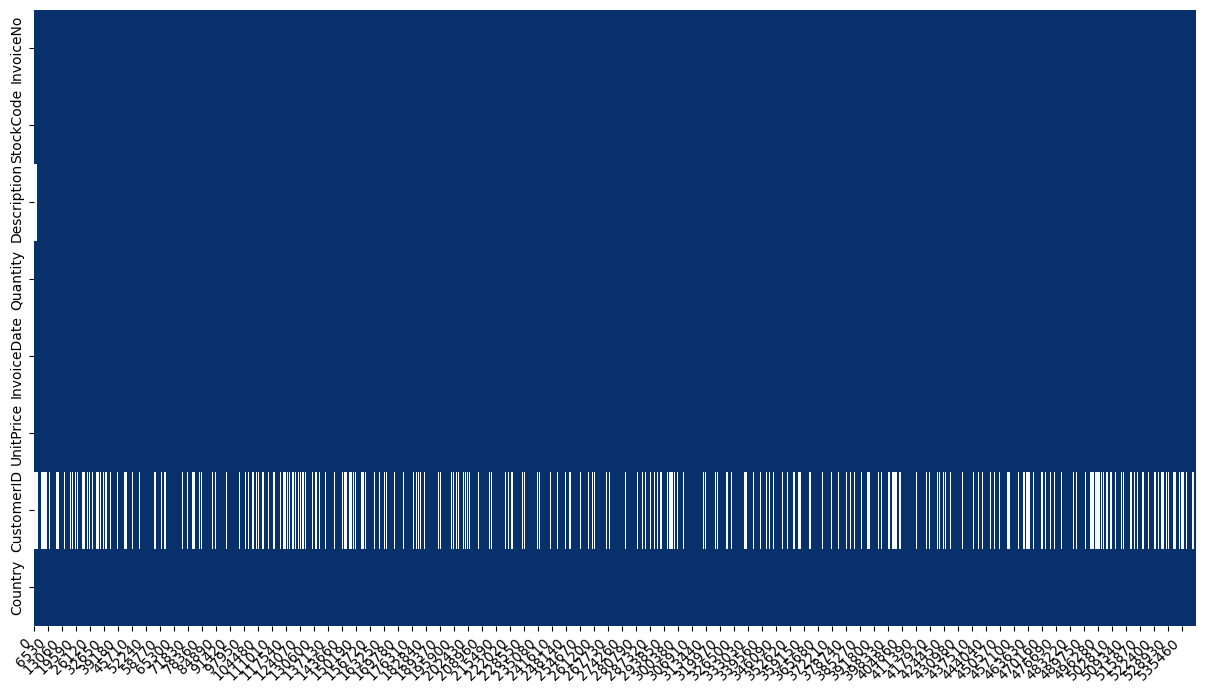

In [ ]:
#Plot Missing Value
plot_missing_value(df, return_df= True)

In [ ]:
#describe numerical data
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Identifikasi Outliers

Kita identifikasi outliers menggunakan IQR score, rumusnya adalah:

* IQR = Q3 - Q1
* lower bound = Q1 - 1.5 * IQR
* upper bound = Q3 + 1.5 * IQR

In [ ]:
q1_quan = df['Quantity'].quantile(0.25)
q3_quan = df['Quantity'].quantile(0.75)
iqr_quan = q3_quan - q1_quan
lb_quan = float(q1_quan) - (1.5 * iqr_quan)
ub_quan = float(q3_quan) + (1.5 * iqr_quan)

print('Q1 = {}'.format(q1_quan))
print('Q3 = {}'.format(q3_quan))
print('IQR = {}'.format(iqr_quan))
print('lower bound = {}'.format(lb_quan))
print('upper bound= {}'.format(ub_quan))

Q1 = 1.0
Q3 = 10.0
IQR = 9.0
lower bound = -12.5
upper bound= 23.5


In [ ]:
q1_unit = df['UnitPrice'].quantile(0.25)
q3_unit = df['UnitPrice'].quantile(0.75)
iqr_unit = q3_unit - q1_unit
lb_unit = float(q1_quan) - (1.5 * iqr_unit)
ub_unit = float(q3_quan) + (1.5 * iqr_unit)

print('Q1 = {}'.format(q1_unit))
print('Q3 = {}'.format(q3_unit))
print('IQR = {}'.format(iqr_unit))
print('lower bound = {}'.format(lb_unit))
print('upper bound= {}'.format(ub_unit))

Q1 = 1.25
Q3 = 4.13
IQR = 2.88
lower bound = -3.3200000000000003
upper bound= 14.32


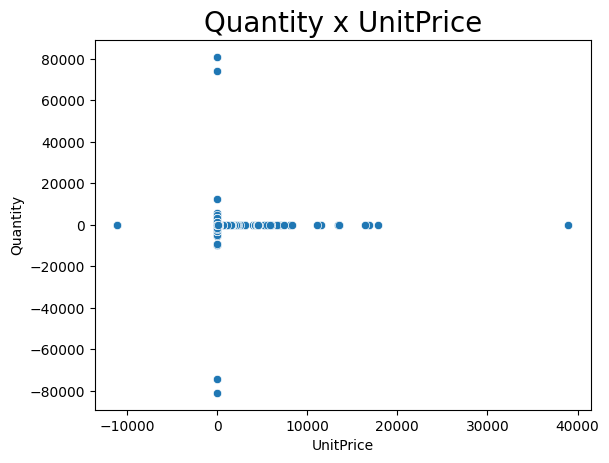

In [ ]:
sns.scatterplot(x = df['UnitPrice'], y = df['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20);

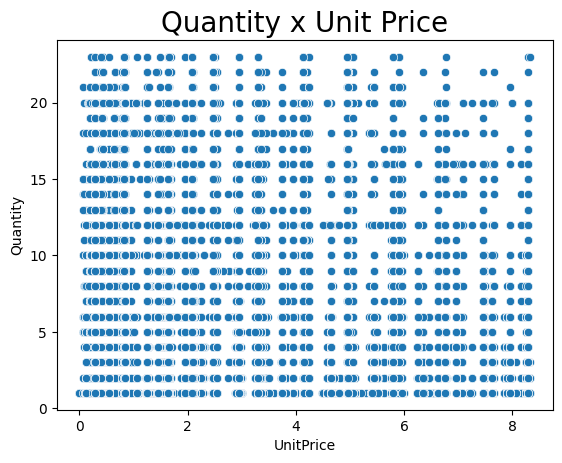

In [ ]:
dx = df[df['Quantity']>0] #hilangkan value negatif
dy = df[df['UnitPrice']>0] #hilangkan value negatif

filtered_quantity = dx.query('(@q1_quan - 1.5 * @iqr_quan) <= Quantity <= (@q3_quan + 1.5 * @iqr_quan)')
filtered_unitprice = dy.query('(@q1_unit - 1.5 * @iqr_unit) <= UnitPrice <= (@q3_unit + 1.5 * @iqr_unit)')


sns.scatterplot(x = filtered_unitprice['UnitPrice'], y = filtered_quantity['Quantity'])
plt.title('Quantity x Unit Price', fontsize = 20);

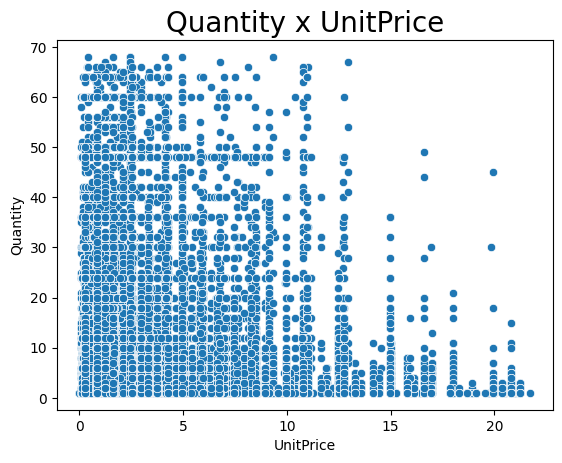

In [ ]:
q1_quan_custom = df['Quantity'].quantile(0.5)
q3_quan_custom = df['Quantity'].quantile(0.95)
iqr_quan_custom = q3_quan_custom - q1_quan_custom

q1_unitprice_custom = df['UnitPrice'].quantile(0.5)
q3_unitprice_custom = df['UnitPrice'].quantile(0.95)
iqr_unitprice_custom = q3_unitprice_custom - q1_unitprice_custom

dx = df[df['Quantity']>0] #hilangkan value negatif
dy = df[df['UnitPrice']>0] #hilangkan value negatif

filtered_quantity = dx.query('(@q1_quan_custom - 1.5 * @iqr_quan_custom) <= Quantity <= (@q3_quan_custom + 1.5 * @iqr_quan_custom)')
filtered_unitprice = dy.query('(@q1_unitprice_custom - 1.5 * @iqr_unitprice_custom) <= UnitPrice <= (@q3_unitprice_custom + 1.5 * @iqr_unitprice_custom)')

sns.scatterplot(x = filtered_unitprice['UnitPrice'], y = filtered_quantity['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20);

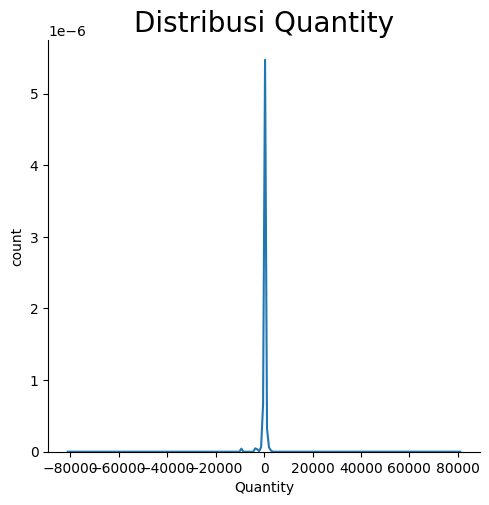

In [ ]:
sns.displot(df['Quantity'], kind='kde')
plt.title('Distribusi Quantity', fontsize = 20)
plt.xlabel('Quantity')
plt.ylabel('count');

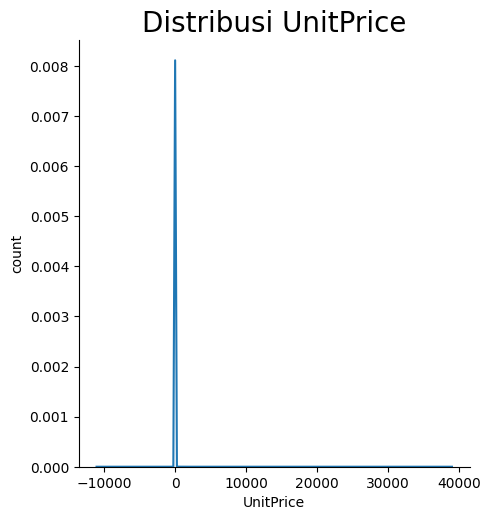

In [ ]:
sns.displot(df['UnitPrice'], kind='kde')
plt.title('Distribusi UnitPrice', fontsize = 20)
plt.xlabel('UnitPrice')
plt.ylabel('count');

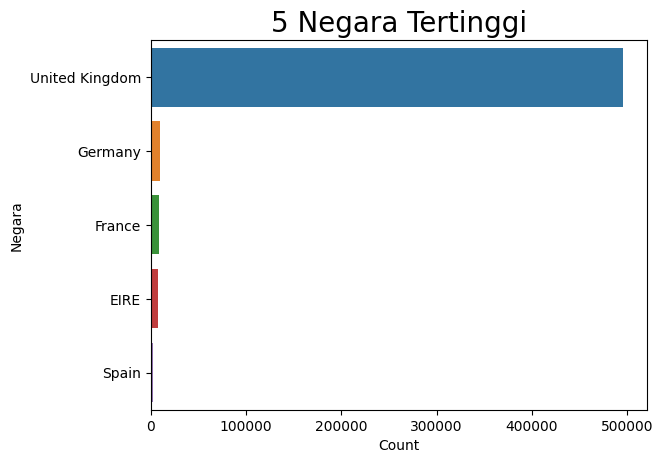

In [ ]:
x = df['Country'].value_counts().head(5)
sns.barplot(x = x.values, y = x.index)
plt.title('5 Negara Tertinggi', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Negara');

In [ ]:
x = df['Country'].nunique()
print('Terdapat total {} negara'.format(x))

country = pd.DataFrame(df['Country'].value_counts()).reset_index()
country.columns = ['Negara', 'Jumlah Transaksi']
country

Terdapat total 38 negara


,Negara,Jumlah Transaksi
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


# Segmentasi Costumer menggunakan library Lifetimes

**Preparing Data**


In [ ]:
#Remove data except UK
df = df[df['Country'] == 'United Kingdom']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536414,22139,NaN,56,12/1/2010 11:52:00,0.0,NaN,United Kingdom
1,536545,21134,NaN,1,12/1/2010 14:32:00,0.0,NaN,United Kingdom
2,536546,22145,NaN,1,12/1/2010 14:33:00,0.0,NaN,United Kingdom
3,536547,37509,NaN,1,12/1/2010 14:33:00,0.0,NaN,United Kingdom
4,536549,85226A,NaN,1,12/1/2010 14:34:00,0.0,NaN,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.0+ MB


In [ ]:
#Transform Invoice Date to Datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
2,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
3,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
4,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [ ]:
#Remove Na
df = df[~df['CustomerID'].isna()]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1838,537435,M,Manual,2,2010-12-06 16:58:00,5.95,17920.0,United Kingdom
1839,578017,M,Manual,1,2011-11-22 13:07:00,1.50,13569.0,United Kingdom
1840,C570301,M,Manual,-1,2011-10-10 12:04:00,682.05,16900.0,United Kingdom
1841,C569982,M,Manual,-1,2011-10-06 19:39:00,218.72,15365.0,United Kingdom
1842,541564,M,Manual,10,2011-01-19 11:38:00,0.38,16904.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 1838 to 541898
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [ ]:
#Remove value 0 and negative
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1838,537435,M,Manual,2,2010-12-06 16:58:00,5.95,17920.0,United Kingdom
1839,578017,M,Manual,1,2011-11-22 13:07:00,1.50,13569.0,United Kingdom
1842,541564,M,Manual,10,2011-01-19 11:38:00,0.38,16904.0,United Kingdom
1843,572682,M,Manual,72,2011-10-25 13:52:00,0.39,17928.0,United Kingdom
1844,571289,M,Manual,1,2011-10-16 15:27:00,0.39,15113.0,United Kingdom


In [ ]:
#Creating Revenue column (Revenue = Quantity * UnitPrice)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
1838,537435,M,Manual,2,2010-12-06 16:58:00,5.95,17920.0,United Kingdom,11.90
1839,578017,M,Manual,1,2011-11-22 13:07:00,1.50,13569.0,United Kingdom,1.50
1842,541564,M,Manual,10,2011-01-19 11:38:00,0.38,16904.0,United Kingdom,3.80
1843,572682,M,Manual,72,2011-10-25 13:52:00,0.39,17928.0,United Kingdom,28.08
1844,571289,M,Manual,1,2011-10-16 15:27:00,0.39,15113.0,United Kingdom,0.39


In [ ]:
orders = df.groupby(['InvoiceNo', 'InvoiceDate']).sum().reset_index()
orders.head()

,InvoiceNo,InvoiceDate,Quantity,UnitPrice,CustomerID,Revenue
0,536365,2010-12-01 08:26:00,40,27.37,124950.0,139.12
1,536366,2010-12-01 08:28:00,12,3.70,35700.0,22.20
2,536367,2010-12-01 08:34:00,83,58.24,156564.0,278.73
3,536368,2010-12-01 08:34:00,15,19.10,52188.0,70.05
4,536369,2010-12-01 08:35:00,3,5.95,13047.0,17.85


**RFM Model**


In [ ]:
#RFM
rfm = summary_data_from_transaction_data(orders, 'CustomerID', 'InvoiceDate', monetary_value_col='Revenue').reset_index()
rfm

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000000
1,12748.0,26.0,366.0,373.0,56.464615
2,12749.0,0.0,0.0,130.0,0.000000
3,12823.0,4.0,222.0,296.0,363.375000
4,12830.0,0.0,0.0,134.0,0.000000
...,...,...,...,...,...
13313,6131760.0,0.0,0.0,39.0,0.000000
13314,6230432.0,0.0,0.0,16.0,0.000000
13315,7456784.0,0.0,0.0,4.0,0.000000
13316,7513168.0,0.0,0.0,11.0,0.000000


Text(0.5, 0, 'Frequency')

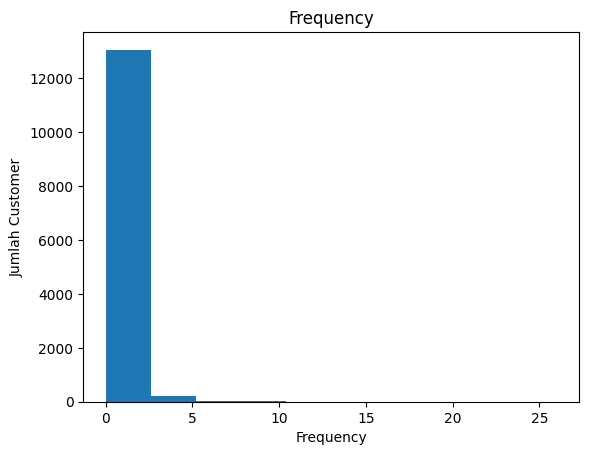

In [ ]:
plt.hist(rfm['frequency'])
plt.title('Frequency')
plt.ylabel('Jumlah Customer')
plt.xlabel('Frequency')

In [ ]:
#Drop 0 Frequency (Customer not doing repurchase)
rfm = rfm[rfm['frequency']>0]
rfm.head()

,CustomerID,frequency,recency,T,monetary_value
1,12748.0,26.0,366.0,373.0,56.464615
3,12823.0,4.0,222.0,296.0,363.375000
6,12843.0,1.0,103.0,168.0,9.950000
7,12845.0,1.0,3.0,270.0,73.500000
9,12875.0,1.0,219.0,362.0,49.470000


Text(0.5, 0, 'Frequency')

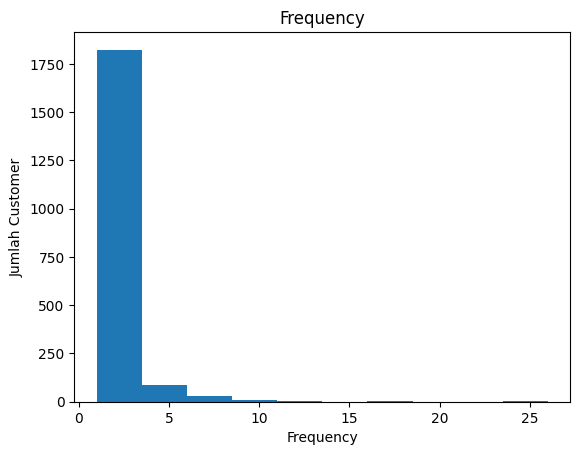

In [ ]:
plt.hist(rfm['frequency'])
plt.title('Frequency')
plt.ylabel('Jumlah Customer')
plt.xlabel('Frequency')

Text(0.5, 0, 'Monetary Value')

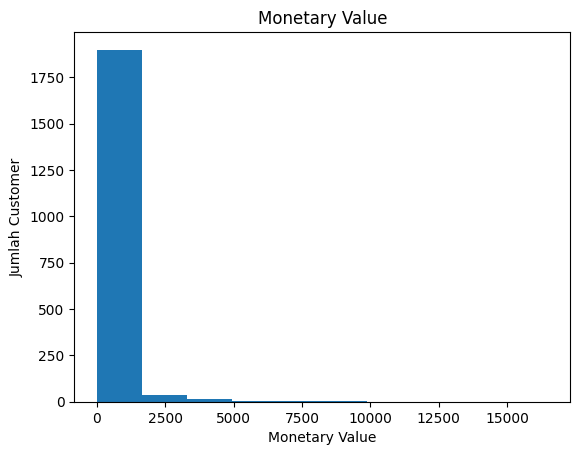

In [ ]:
plt.hist(rfm['monetary_value'])
plt.title('Monetary Value')
plt.ylabel('Jumlah Customer')
plt.xlabel('Monetary Value')

In [ ]:
rfm = rfm[rfm['monetary_value']<2000]
rfm.head()

,CustomerID,frequency,recency,T,monetary_value
1,12748.0,26.0,366.0,373.0,56.464615
3,12823.0,4.0,222.0,296.0,363.375000
6,12843.0,1.0,103.0,168.0,9.950000
7,12845.0,1.0,3.0,270.0,73.500000
9,12875.0,1.0,219.0,362.0,49.470000


Text(0.5, 0, 'Monetary Value')

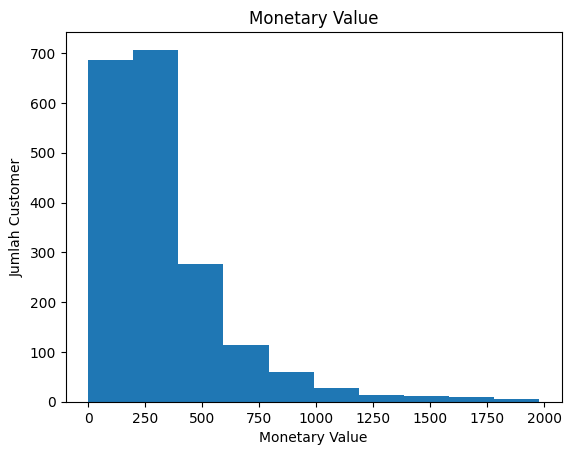

In [ ]:
plt.hist(rfm['monetary_value'])
plt.title('Monetary Value')
plt.ylabel('Jumlah Customer')
plt.xlabel('Monetary Value')

In [ ]:
# Calculate RFM Score
quartiles = rfm.quantile(q=[0.25, 0.50, 0.75])
quartiles

,CustomerID,frequency,recency,T,monetary_value
0.25,66621.0,1.0,60.0,176.0,142.935
0.50,159818.5,1.0,128.0,256.0,292.555
0.75,292559.5,2.0,221.0,325.0,412.435


In [ ]:
def recency_score (data) :
    if data <= 60 :
      return 1
    elif data <= 128:
      return 2
    elif data <= 221:
      return 3
    else :
      return 4
def frequency_score (data):
    if data <= 1:
      return 1
    elif data <= 1:
      return 2
    elif data <= 2:
      return 3
    else:
      return 4
def monetary_value (data):
    if data <= 176:
      return 1
    elif data <= 256:
      return 2
    elif data <= 412:
      return 3
    else:
      return 4

rfm ['R'] = rfm['recency'].apply(recency_score)
rfm ['F'] = rfm['frequency'].apply(frequency_score)
rfm ['M'] = rfm['monetary_value'].apply(monetary_value)
rfm.head()

,CustomerID,frequency,recency,T,monetary_value,R,F,M
1,12748.0,26.0,366.0,373.0,56.464615,4,4,1
3,12823.0,4.0,222.0,296.0,363.375000,4,4,3
6,12843.0,1.0,103.0,168.0,9.950000,2,1,1
7,12845.0,1.0,3.0,270.0,73.500000,1,1,1
9,12875.0,1.0,219.0,362.0,49.470000,3,1,1


In [ ]:
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,CustomerID,frequency,recency,T,monetary_value,R,F,M,RFM_Score
1,12748.0,26.0,366.0,373.0,56.464615,4,4,1,9
3,12823.0,4.0,222.0,296.0,363.375000,4,4,3,11
6,12843.0,1.0,103.0,168.0,9.950000,2,1,1,4
7,12845.0,1.0,3.0,270.0,73.500000,1,1,1,3
9,12875.0,1.0,219.0,362.0,49.470000,3,1,1,5


In [ ]:
#Labeling RFM
rfm['label'] = 'Bronze'
rfm.loc[rfm['RFM_Score'] > 4, 'label'] = 'Silver'
rfm.loc[rfm['RFM_Score'] > 6, 'label'] = 'Gold'
rfm.loc[rfm['RFM_Score'] > 8, 'label'] = 'Platinum'
rfm.loc[rfm['RFM_Score'] > 10, 'label'] = 'Diamond'

rfm.head()

,CustomerID,frequency,recency,T,monetary_value,R,F,M,RFM_Score,label
1,12748.0,26.0,366.0,373.0,56.464615,4,4,1,9,Platinum
3,12823.0,4.0,222.0,296.0,363.375000,4,4,3,11,Diamond
6,12843.0,1.0,103.0,168.0,9.950000,2,1,1,4,Bronze
7,12845.0,1.0,3.0,270.0,73.500000,1,1,1,3,Bronze
9,12875.0,1.0,219.0,362.0,49.470000,3,1,1,5,Silver


  Silver  Gold  Bronze  Platinum  Diamond
     654   522     325       273      136


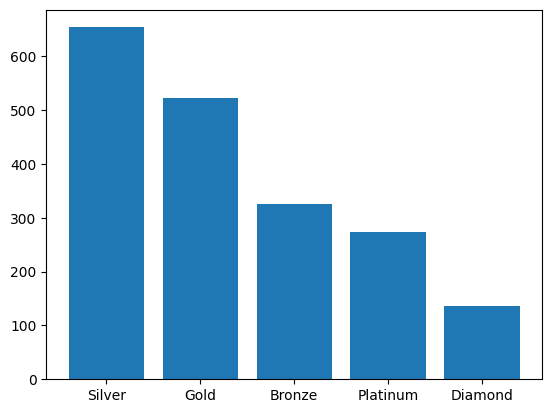

In [ ]:
barplot = dict(rfm['label'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names, bar_values)
print(pd.DataFrame(barplot, index=['']))